### Name : Neeharika Ramanujula

# LGM VIP Task 4 : Next Word Prediction


## Aim : Using Tensorflow and Keras library train a RNN, to predict the next word.

### Importing Modules
import all the necessary libraries

In [1]:
import numpy as np
from numpy import array
import tensorflow as tf
from nltk.tokenize import RegexpTokenizer
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

loading the data

In [2]:
text = open(r'C:/Users/lenovo/Documents/ds_intern/Task_4/1661-0.txt', encoding="utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


replacing the \n and \r with spaces in the given text

In [3]:
text = open(r'C:/Users/lenovo/Documents/ds_intern/Task_4/1661-0.txt', encoding="utf8")
lines = []
for i in text:
    lines.append(i)
    
ds = ""
for i in lines:
    ds =' '.join(lines)
    
ds = ds.replace('\n', '').replace('\r', '').replace('\ufeff','')
ds[:300]


" Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or "

In [4]:
#removing the punctuation marks to get more clear results
import string
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
data=ds.translate(translator)
data[:300]

' Project Gutenberg s The Adventures of Sherlock Holmes  by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever   You may copy it  give it away or re use it under the terms of the Project Gutenberg License included with this eBook or '

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded_data= tokenizer.texts_to_sequences([data])[0]
encoded_data[:10]

[145, 130, 428, 1, 1020, 4, 128, 34, 45, 611]

In [6]:
#determine vocabulary size
vocab_size = len(tokenizer.word_index) + 1 # so that the counting starts from 1
print('Vocabulary size:%d'%vocab_size)

Vocabulary size:8925


In [7]:
#create a sequence of words to fit the model with one word as input and other as output
sequences = list()
for i in range(1, len(encoded_data)):
    sequence = encoded_data[i-1:i+1]
    sequences.append(sequence)
print('total sequence:%d'%len(sequences)) # we have 111251 ip/op pair to train the network

total sequence:111258


In [8]:
#divide the sequence into x as input and y as output
sequences = array(sequences)
x, y = sequences[:,0],sequences[:,1]

In [9]:
y  = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
#create the model and add layers to the neural network
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             89250     
_________________________________________________________________
lstm (LSTM)                  (None, 1, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 8925)              8933925   
Total params: 22,072,175
Trainable params: 22,072,175
Non-trainable params: 0
_________________________________________________________________
None


### Training of model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(x,y,validation_split=0.05, batch_size=128,epochs=20, shuffle=True).history

Epoch 1/20
826/826 [==============================] - 249s 301ms/step - loss: 3.8379 - accuracy: 0.1945 - val_loss: 12.5064 - val_accuracy: 0.1154
Epoch 2/20
826/826 [==============================] - 245s 297ms/step - loss: 3.8327 - accuracy: 0.1942 - val_loss: 12.4089 - val_accuracy: 0.1197
Epoch 3/20
826/826 [==============================] - 245s 297ms/step - loss: 3.8311 - accuracy: 0.1946 - val_loss: 12.4226 - val_accuracy: 0.1172
Epoch 4/20
826/826 [==============================] - 244s 295ms/step - loss: 3.8252 - accuracy: 0.1941 - val_loss: 12.1779 - val_accuracy: 0.1217
Epoch 5/20
826/826 [==============================] - 253s 306ms/step - loss: 3.8226 - accuracy: 0.1957 - val_loss: 12.4742 - val_accuracy: 0.1192
Epoch 6/20
826/826 [==============================] - 254s 307ms/step - loss: 3.8191 - accuracy: 0.1954 - val_loss: 12.1015 - val_accuracy: 0.1168
Epoch 7/20
826/826 [==============================] - 251s 304ms/step - loss: 3.8148 - accuracy: 0.1946 - val_loss: 12

### Evaluation of the predicted model

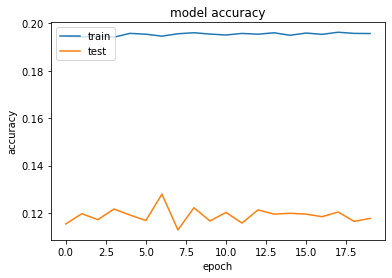

In [14]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

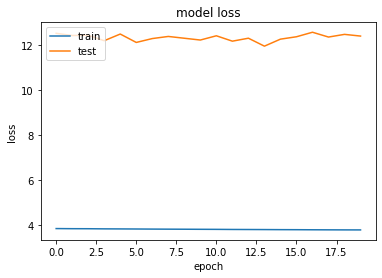

In [15]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Testing the model

In [19]:
test = ['night his','manner was','on Thursday']

for t in test:
    example = tokenizer.texts_to_sequences([t])
    prediction = model.predict(np.array(example))
    predicted_word = np.argmax(prediction)
    reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
    print ("{0} -> {1}".format(t, reverse_word_map[predicted_word]))

night his -> key
manner was -> and
on Thursday -> his
